In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
 def plotImage(img, title='Imagem'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Desativa os eixos
    plt.show()

In [3]:
images = ['images/mcqueen.png', 'images/rei.png','images/rio.jpg']
img1 = cv2.imread(images[0])
img2 = cv2.imread(images[1])
img3 = cv2.imread(images[2])

<h3> Operações com imagens </h3>

In [4]:
def twoImagesOperatios(imagem1, imagem2=None):
    # Adição
    soma = cv2.add(imagem1, imagem2) if imagem2 is not None else imagem1

    # Subtração
    subtracao = cv2.subtract(imagem1, imagem2) if imagem2 is not None else imagem1

    # Multiplicação
    multiplicacao = cv2.multiply(imagem1, imagem2) if imagem2 is not None else imagem1

    # Divisão
    divisao = cv2.divide(imagem1, imagem2) if imagem2 is not None and not np.any(imagem2 == 0) else imagem1

    # Exibir resultados
    plotImage(soma, 'Adição')
    plotImage(subtracao, 'Subtração')
    plotImage(multiplicacao, 'Multiplicação')
    plotImage(divisao, 'Divisão')

In [5]:
def imageScalarOperations(imagem, escalar=None):
    # Adição
    soma = cv2.add(imagem, escalar) if escalar is not None else imagem

    # Subtração
    subtracao = cv2.subtract(imagem, escalar) if escalar is not None else imagem

    # Multiplicação
    multiplicacao = cv2.multiply(imagem, escalar) if escalar is not None else imagem

    # Divisão
    divisao = cv2.divide(imagem, escalar) if escalar is not None and escalar != 0 else imagem

    # Exibir resultados
    plotImage(soma, 'Adição')
    plotImage(subtracao, 'Subtração')
    plotImage(multiplicacao, 'Multiplicação')
    plotImage(divisao, 'Divisão')

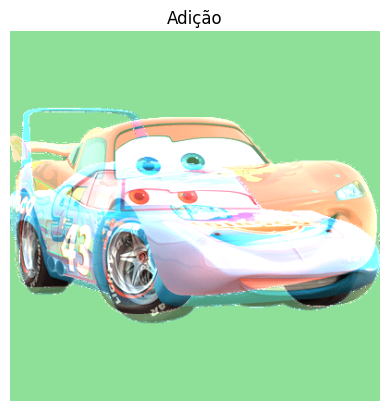

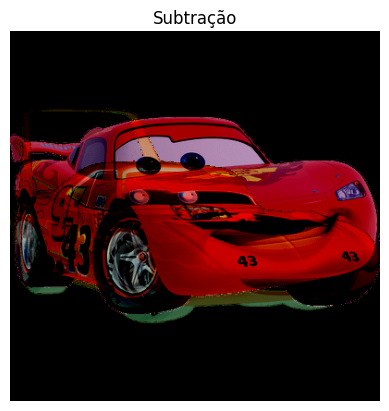

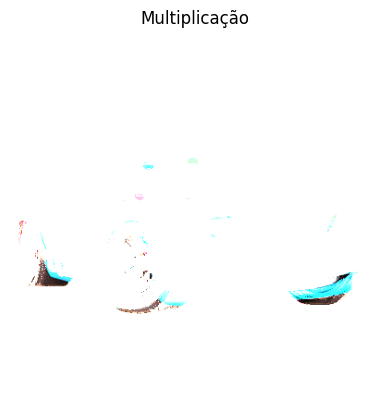

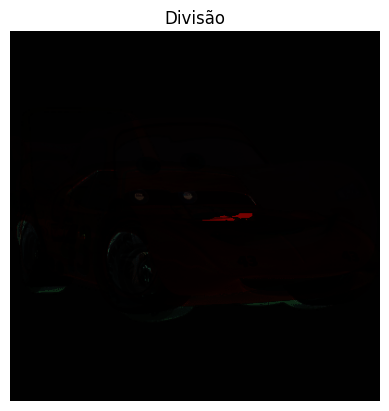

In [6]:
twoImagesOperatios(img1,img2)

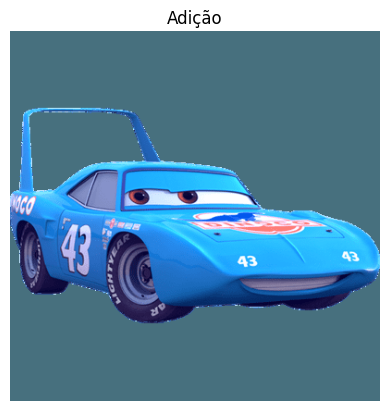

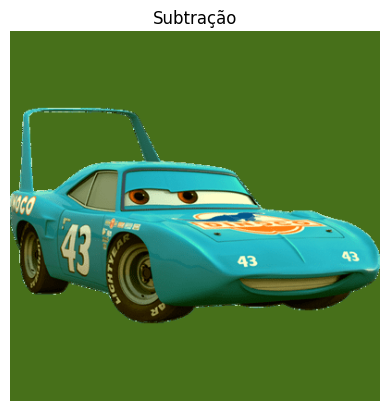

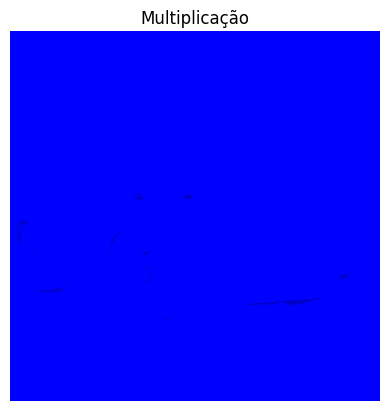

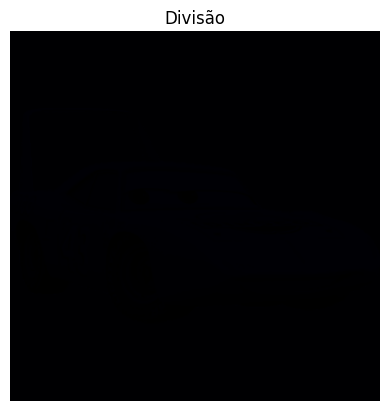

In [7]:
imageScalarOperations(img2, 50)

<h3>Manipulação dos vizinhos (Operações)</h3>

In [8]:
def neighbors_manipulation(img, n):
    
    mask = np.full( (400, 400), 50 )
    
    for i in range(n):
        for j in range (n):
            img[i][j]  =  img[i][j] * mask[i][j]
        
            
    plotImage(img)
    return

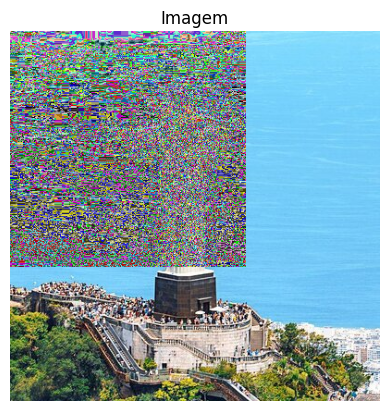

In [9]:
cristo = img3 + 0
neighbors_manipulation(cristo,255)

<h3>Resolução espacial X Resolução de intensidade</h3>

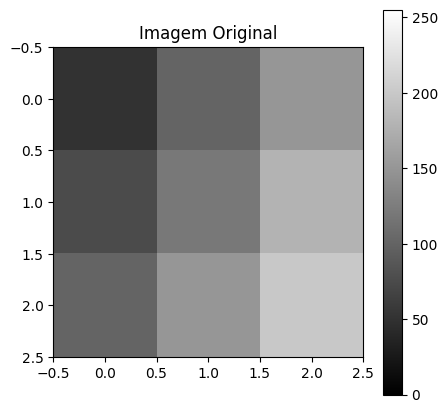

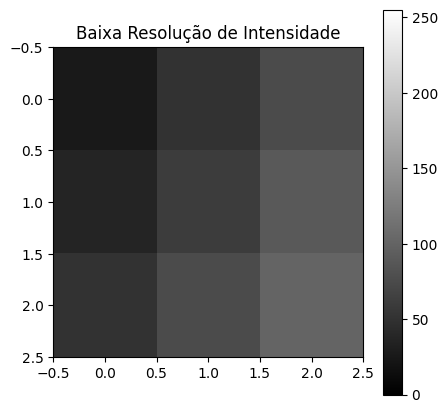

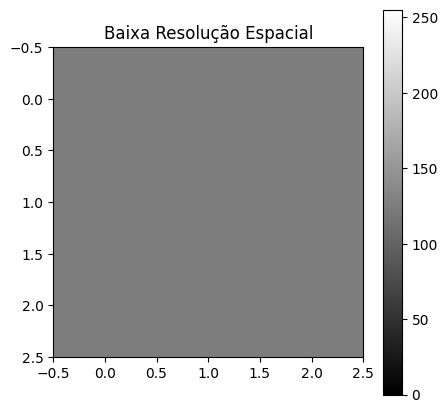

In [10]:
# Criar uma imagem de exemplo (escala de cinza)
image = np.array([[50, 100, 150],
                  [75, 120, 180],
                  [100, 150, 200]])

# Mostrar a imagem original
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.colorbar()
plt.show()

# Simular baixa resolução de intensidade (redução do contraste)
low_intensity_resolution = image * 0.5

# Mostrar a imagem com baixa resolução de intensidade
plt.figure(figsize=(5, 5))
plt.imshow(low_intensity_resolution, cmap='gray', vmin=0, vmax=255)
plt.title('Baixa Resolução de Intensidade')
plt.colorbar()
plt.show()

# Simular baixa resolução espacial (borramento)
# Resolucao espacial = pares de retas discerniveis por unidade de distancia
low_spatial_resolution = np.array([[125, 125, 125],
                                   [125, 125, 125],
                                   [125, 125, 125]])

# Mostrar a imagem com baixa resolução espacial
plt.figure(figsize=(5, 5))
plt.imshow(low_spatial_resolution, cmap='gray', vmin=0, vmax=255)
plt.title('Baixa Resolução Espacial')
plt.colorbar()
plt.show()


<h3>Convolução entre imagem e uma máscara <h3>

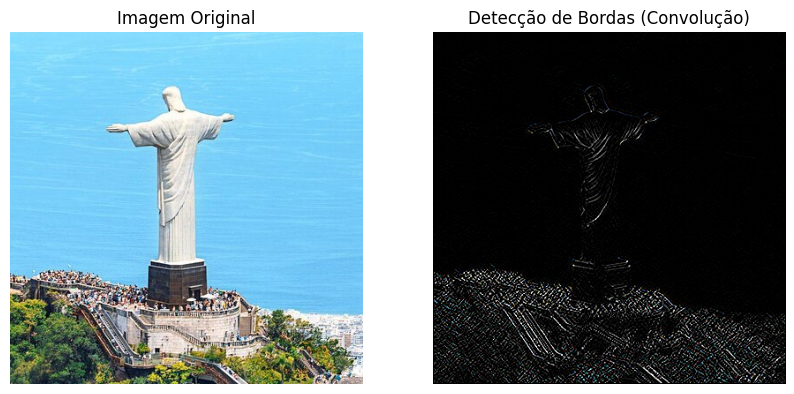

In [11]:
# Criar uma imagem de exemplo (imagem gradiente)
image = img3
image[:, 400:] = 255

# Definir uma máscara de borda
kernel = np.array([[1, 0, -1],
                   [0, 0, 0],
                   [-1, 0, 1]], dtype=np.float32)

# Aplicar convolução usando cv2.filter2D
result_image = cv2.filter2D(image, -1, kernel)

# Plotar as imagens
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Detecção de Bordas (Convolução)')
plt.axis('off')

plt.show()

<h3>Ampliação e redução de imagem</h3>

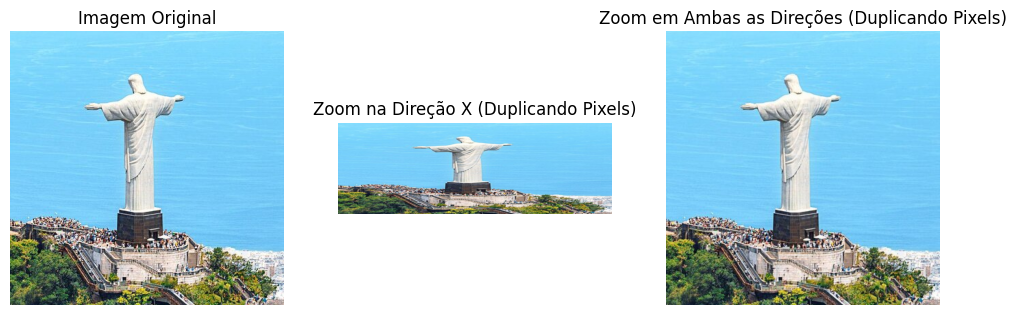

In [12]:
# Carregar uma imagem de exemplo
image = cv2.imread('images/rio.jpg')

# Obter as dimensões da imagem
height, width, _ = image.shape

# Fator de zoom (duplicando os valores dos pixels em ambas as direções)
zoom_factor = 3

# Ampliação na direção X duplicando os pixels
zoomed_in_x = np.repeat(image, zoom_factor, axis=1)

# Ampliação na direção Y duplicando os pixels
zoomed_in_y = np.repeat(zoomed_in_x, zoom_factor, axis=0)

# Plotar as imagens
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(zoomed_in_x, cv2.COLOR_BGR2RGB))
plt.title('Zoom na Direção X (Duplicando Pixels)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(zoomed_in_y, cv2.COLOR_BGR2RGB))
plt.title('Zoom em Ambas as Direções (Duplicando Pixels)')
plt.axis('off')

plt.show()
